<a href="https://colab.research.google.com/github/r2x4/machine_alura_oracle/blob/main/frecuencia_medidas/colab_estadistica.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=#56B4E9 size=10>CURSO DE ESTADÍSTICA</font>
***

<font color=#56B4E9 size = 5>*Preparando el ambiente*</font>

# <font color=#56B4E9>1 CONOCIENDO LOS DATOS</font>
***

## <font color=#56B4E9>1.1 Dataset del proyecto</font>
***

### Muestra de domicilios Colombia - 2018

Las investigaciones por muestras de domicilios realizadas anualmente, buscan encontrar característcias generales de la población, de educación, trabajo, rendimiento y otras, de acuerdo con las necesidades de información del país, tales como las características de migración, fertilidad, casamientos, salud, nutrición, entre otros temas. Estas muestras al pasar de los años consistuyen una herramienta importante para la formulación, validación y evaluación de políticas dirigidas al desarrollo socioeconómico y la mejora de las condiciones de vida en Colombia.


### Datos

Los datos fueron creados  de manera didáctica para este curso.

### Variables utilizadas

> ### Ingreso
> ***

Ingresos mensuales (en miles de pesos) del trabajo principal para personas de 10 años o más.

> ### Edad
> ***

Edad del entrevistado en la fecha de referencia en años.

> ### Altura
> ***

Altura del entrevistado em metros.

> ### Ciudad
> ***

Código de referência a 27 ciudades analizadas.


> ### Sexo
> ***

|Código|Descripción|
|---|---|
|0|Masculino|
|1|Femenino|

> ### Años de Estudio
> ***

|Código|Descripción|
|---|---|
|1|Sin estudios y menos de 1 año|
|2|1 año|
|3|2 años|
|4|3 años|
|5|4 años|
|6|5 años|
|7|6 años|
|8|7 años|
|9|8 años|
|10|9 años|
|11|10 años|
|12|11 años|
|13|12 años|
|14|13 años|
|15|14 años|
|16|15 años o más|
|17|No se sabe|
||No aplica|

> ### Color
> ***

|Código|Descripción|
|---|---|
|0|Indio|
|2|Blanco|
|4|Negro|
|6|Amarillo|
|8|Moreno|
|9|Sin declarar|

> ### Tratamiento a los datos
***

> Algunos de los tratamientos de datos más frecuentes son:
> 1. Eliminar las observaciones (líneas) con entradas de datos inválidos;
> 2. Eliminar observaciones donde hay datos perdidos (missing data);
> 3. Filtros própios de la investigación, por ejemplo: considerar solo las encuestas realizadas a la cabeza de familia (responsable por el domicilio).

### Importando pandas y leyendo el dataset del projecto

https://pandas.pydata.org/

In [451]:
import pandas as pd

In [452]:
datos = pd.read_csv("/content/datos.csv")

In [453]:
datos.sample(10)

,Ciudad,Sexo,Edad,Color,Años de Estudio,Ingreso,Altura
4616,13,0,62,8,9,788,1.655384
3812,13,1,47,8,16,2000,1.738453
48379,35,0,53,2,5,2100,1.896311
72602,52,0,36,8,12,1217,1.721104
47031,35,0,49,2,15,1200,1.734107
63121,43,0,64,2,9,0,1.609953
59417,41,0,46,8,12,2500,1.619409
14240,22,0,42,8,3,800,1.731310
17340,23,0,31,8,13,900,1.683173
56097,41,0,44,4,16,4500,1.615181


## <font color=#56B4E9>1.2 Tipos de datos</font>
***

### Clasificación de una variable
<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img001.png' width='70%'>

### Variables cualitativas ordinales

► Variables que pueden ser ordenadas o que responen algun tipo de jerarquía

In [454]:
sorted(datos['Años de Estudio'].unique())

[np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17)]

### Variables cualitativas nominales

► Variables que no pueden ser ordenadas ni responden alguna jerarquía.

In [455]:
sorted(datos['Sexo'].unique())

[np.int64(0), np.int64(1)]

In [456]:
sorted(datos['Color'].unique())

[np.int64(0), np.int64(2), np.int64(4), np.int64(6), np.int64(8)]

In [457]:
sorted(datos['Ciudad'].unique())

[np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17),
 np.int64(21),
 np.int64(22),
 np.int64(23),
 np.int64(24),
 np.int64(25),
 np.int64(26),
 np.int64(27),
 np.int64(28),
 np.int64(29),
 np.int64(31),
 np.int64(32),
 np.int64(33),
 np.int64(35),
 np.int64(41),
 np.int64(42),
 np.int64(43),
 np.int64(50),
 np.int64(51),
 np.int64(52),
 np.int64(53)]

### Variables cuantitativas discretas

► Variables que representan un conteo donde los valores posibles forman un conjunto finito o numerable.


In [458]:
datos.Edad.max()

99

In [459]:
print(f"La edad mínima es {datos.Edad.min()} y la edad máxima es {datos.Edad.max()}")

La edad mínima es 13 y la edad máxima es 99


#### <font color='red'>Observación</font>
***
> La variable edad puede ser clasificada de tres formas diferentes:
> 1. <b>CUANTITATIVA DISCRETA</b> - cuando representa años completos (números enteros);
> 2. <b>CUANTITATIVA CONTINUA</b> - cuando representa la edad exacta, siendo representada por fracciones de años;
> 3. <b>CUALITATIVA ORDINAL</b> - cuando representa  intervalos de edad.

### Variables cuantitativas continuas

► Variables que representan un conteo o medición que asume valores en escalas continuas (números reales).

In [460]:
print(f"La Altura mínima es {datos['Altura'].min()} y la altura máxima es {datos['Altura'].max()}")

La Altura mínima es 1.339244614 y la altura máxima es 2.028496765


# <font color=#56B4E9>2 DISTRIBUCIÓN DE FRECUENCIAS</font>
***

El primer paso en un análisis es conocer el comportamiento de las variables involucradas en el estudio. Utilizando técnicas estadísticas como el análisis de las <b> DISTRIBUCIONES DE FRECUENCIAS </b> e <b> HISTOGRAMAS </b> podemos evaluar mejor cómo se distribuyen los fenómenos del estudio.



## <font color=#56B4E9>2.1 Distribución de frecuencias para variables cualitativas</font>
***

### Método 1

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.value_counts.html

In [461]:
# ve rpor grupos de hombres y mujeres

datos.Sexo.value_counts()

,count
Sexo,
0,53250
1,23590


In [462]:
# lo vamos a ver por poorcentaje

datos.Sexo.value_counts(normalize = True).round(4) * 100

,proportion
Sexo,
0,69.3
1,30.7


In [463]:
# varibale
frecuencia_sexo = datos.Sexo.value_counts()
frecuencia_sexo

,count
Sexo,
0,53250
1,23590


In [464]:
# porcentaje

porcentaje_sexo = datos.Sexo.value_counts(normalize = True).round(4) * 100
porcentaje_sexo

,proportion
Sexo,
0,69.3
1,30.7


In [465]:
# crear tabla= crear dataframe

dist_frec_cualitativa = pd.DataFrame({'Frecuencia': frecuencia_sexo, 'Porcentaje': porcentaje_sexo})
dist_frec_cualitativa

,Frecuencia,Porcentaje
Sexo,,
0,53250,69.3
1,23590,30.7


In [466]:
# renombrar los datos de la columna en este caso 0 - 1

dist_frec_cualitativa.rename(index = {0: 'Masculino', 1: 'Femenino'}, inplace = True)
dist_frec_cualitativa

,Frecuencia,Porcentaje
Sexo,,
Masculino,53250,69.3
Femenino,23590,30.7


In [467]:
# ponemos nombre ala columna

dist_frec_cualitativa.rename_axis('Sexo', axis = 'columns', inplace = True)
dist_frec_cualitativa

Sexo,Frecuencia,Porcentaje
Sexo,,
Masculino,53250,69.3
Femenino,23590,30.7


### Método 2

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.crosstab.html

In [468]:
sexo = {0: 'Masculino',
        1: 'Femenino'}

color = {0: 'Indigena',
         2: 'Blanco',
         4: 'Negro',
         6: 'Amarillo',
         8: 'Pardo',
         9: 'Sin declarar'}

In [469]:
# columnas y filas

frecuencia = pd.crosstab(datos.Sexo,
                    datos.Color)
frecuencia

Color,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


In [470]:
# renombrar

frecuencia.rename(index = sexo, inplace = True)
frecuencia.rename(columns = color, inplace = True)
frecuencia

Color,Indigena,Blanco,Negro,Amarillo,Pardo
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Femenino,101,9621,2889,117,10862


In [471]:
# porcentaje

frecuencia_porc = pd.crosstab(datos.Sexo,
                    datos.Color,
                    normalize = True).round(4) * 100
frecuencia_porc

Color,0,2,4,6,8
Sexo,,,,,
0,0.33,28.88,7.16,0.31,32.62
1,0.13,12.52,3.76,0.15,14.14


In [472]:
# renombrar

frecuencia_porc.rename(index = sexo, inplace = True)
frecuencia_porc.rename(columns = color, inplace = True)
frecuencia_porc

Color,Indigena,Blanco,Negro,Amarillo,Pardo
Sexo,,,,,
Masculino,0.33,28.88,7.16,0.31,32.62
Femenino,0.13,12.52,3.76,0.15,14.14


## <font color=#56B4E9>2.2 Distribución de frecuencia para variables cuantitativas (clases personalizadas)</font>
***

### Paso 1 - Especifique los límites de cada clase

Utilice la siguiente clasificación:

<b>A</b> ► Más de 20 SM

<b>B</b> ► De 10 a 20 SM

<b>C</b> ► De 4 a 10 SM

<b>D</b> ► De 2 a 4 SM

<b>E</b> ► Hasta 2 SM

donde <b>SM</b> es el valor del salario mínimo en ese momento. En nuestro caso <b>788 mil pesos colombianos</b> (2018):

<b>A</b> ► Más de 15.760

<b>B</b> ► De 7.880 a 15.760

<b>C</b> ► De 3.152 a 7.880

<b>D</b> ► De 1.576 a 3.152

<b>E</b> ► Hasta 1.576


In [473]:
datos.Ingreso.min()

0

In [474]:
datos.Ingreso.max()

200000

In [475]:
clases = [0, 1.576, 3.152, 7.880, 15.760, 200000]
clases

[0, 1.576, 3.152, 7.88, 15.76, 200000]

In [476]:
label = ['E', 'D', 'C', 'B', 'A']
label

['E', 'D', 'C', 'B', 'A']

### Paso 2 - Crear la tabla de frecuencias

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.cut.html

In [477]:
# creamos tabla de frecuencia

frecuencia_ingreso = pd.cut(x = datos.Ingreso,
                            bins = clases,
                            labels = label,
                            include_lowest = True)
frecuencia_ingreso.sample(10)

,Ingreso
62454,A
58700,A
208,A
16414,A
36437,A
60865,A
50570,A
59957,A
34048,A
53121,A


In [478]:
# creamos tabla de frecuencia conteo general

frecuencia_ingreso = pd.value_counts(pd.cut(x = datos.Ingreso,
                            bins = clases,
                            labels = label,
                            include_lowest = True))
frecuencia_ingreso

/tmp/ipython-input-478-3842335197.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frecuencia_ingreso = pd.value_counts(pd.cut(x = datos.Ingreso,


,count
Ingreso,
A,73947
E,2867
B,24
C,2
D,0


In [479]:
# otra forma
# Crear tabla de frecuencia con conteo general (frecuencia absoluta)
frecuencia_ingreso = pd.cut(x=datos.Ingreso,
                            bins=clases,
                            labels=label,
                            include_lowest=True).value_counts(sort=True)

frecuencia_ingreso


,count
Ingreso,
A,73947
E,2867
B,24
C,2
D,0


In [480]:
# porcentaje

porcentaje_ingreso = pd.cut(x = datos.Ingreso,
                            bins = clases,
                            labels = label,
                            include_lowest = True).value_counts(sort = True, normalize = True).round(5) * 100
porcentaje_ingreso

,proportion
Ingreso,
A,96.235
E,3.731
B,0.031
C,0.003
D,0.000


In [481]:
# crear tabla= crear dataframe

dist_frec_cuant_personalizada = pd.DataFrame({'Frecuencia': frecuencia_ingreso, 'Porcentaje %': porcentaje_ingreso})

dist_frec_cuant_personalizada.sort_index(ascending = False)

,Frecuencia,Porcentaje %
Ingreso,,
A,73947,96.235
B,24,0.031
C,2,0.003
D,0,0.000
E,2867,3.731


## <font color=#56B4E9>2.3 Distribución de frecuencia para variables cuantitativas (clases de amplitud fija)</font>
***

### Importando bibliotecas

http://www.numpy.org/

In [482]:
import numpy as np

### Paso 1 - Difiniendo el número de clases

#### Regla de Sturges

# $$k = 1 + \frac {10}{3}\log_{10}n$$

In [483]:
# calcular el tamo de la base de datos

n = datos.shape[0]

In [484]:
# regla de sturges

k = 1 + (10/3) * np.log10(n)
k

np.float64(17.285291187298853)

### Paso 2 - Crear la tabla de frecuencias

In [485]:
# crear la frecuencia

frecuencia_sturges = pd.cut(x=datos.Ingreso,
                            bins=17,
                            include_lowest=True).value_counts(sort=False)

frecuencia_sturges

,count
Ingreso,
"(-200.001, 11764.706]",75594
"(11764.706, 23529.412]",1022
"(23529.412, 35294.118]",169
"(35294.118, 47058.824]",19
"(47058.824, 58823.529]",16
"(58823.529, 70588.235]",5
"(70588.235, 82352.941]",4
"(82352.941, 94117.647]",1
"(94117.647, 105882.353]",6


In [486]:
# porcentaje

porcentaje_sturges = pd.cut(x = datos.Ingreso,
                            bins = 17,
                            include_lowest = True).value_counts(
                                normalize = True,
                                sort = False).round(5) * 100

porcentaje_sturges


,proportion
Ingreso,
"(-200.001, 11764.706]",98.378
"(11764.706, 23529.412]",1.330
"(23529.412, 35294.118]",0.220
"(35294.118, 47058.824]",0.025
"(47058.824, 58823.529]",0.021
"(58823.529, 70588.235]",0.007
"(70588.235, 82352.941]",0.005
"(82352.941, 94117.647]",0.001
"(94117.647, 105882.353]",0.008


In [487]:
# crear la tabla

dist_frec_cuant_amplitud_fija = pd.DataFrame({'Frecuencia': frecuencia_sturges, 'Porcentaje %': porcentaje_sturges})

dist_frec_cuant_amplitud_fija.sort_index(ascending = False)

,Frecuencia,Porcentaje %
Ingreso,,
"(188235.294, 200000.0]",3,0.004
"(176470.588, 188235.294]",0,0.000
"(164705.882, 176470.588]",0,0.000
"(152941.176, 164705.882]",0,0.000
"(141176.471, 152941.176]",0,0.000
"(129411.765, 141176.471]",0,0.000
"(117647.059, 129411.765]",1,0.001
"(105882.353, 117647.059]",0,0.000
"(94117.647, 105882.353]",6,0.008


## <font color=#56B4E9>2.4 Histograma</font>
***

El <b>HISTOGRAMA</b> es la representación gráfica de una distribución de frecuencia. Es un gráfico formado por un conjunto de rectángulos colocados uno al lado del otro, donde el área de cada rectángulo es proporcional a la frecuencia de la clase que representa.

### Importando la biblioteca

https://seaborn.pydata.org/

In [488]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipython-input-489-4031094177.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(datos.Altura, kde=False)


<Axes: title={'center': 'Histograma de Altura'}, xlabel='Altura (m)'>

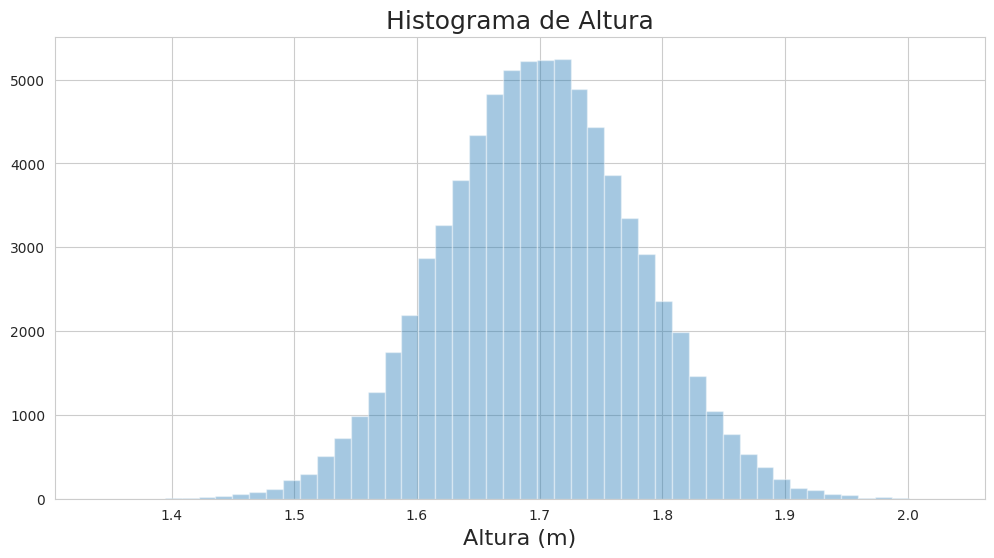

In [489]:
# hacer histograma

ax = sns.distplot(datos.Altura, kde=False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Histograma de Altura', fontsize=18)
ax.set_xlabel('Altura (m)', fontsize=16)
ax


/tmp/ipython-input-490-733550407.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(datos.Altura, kde=True)


<Axes: title={'center': 'Histograma de Altura'}, xlabel='Altura (m)', ylabel='Density'>

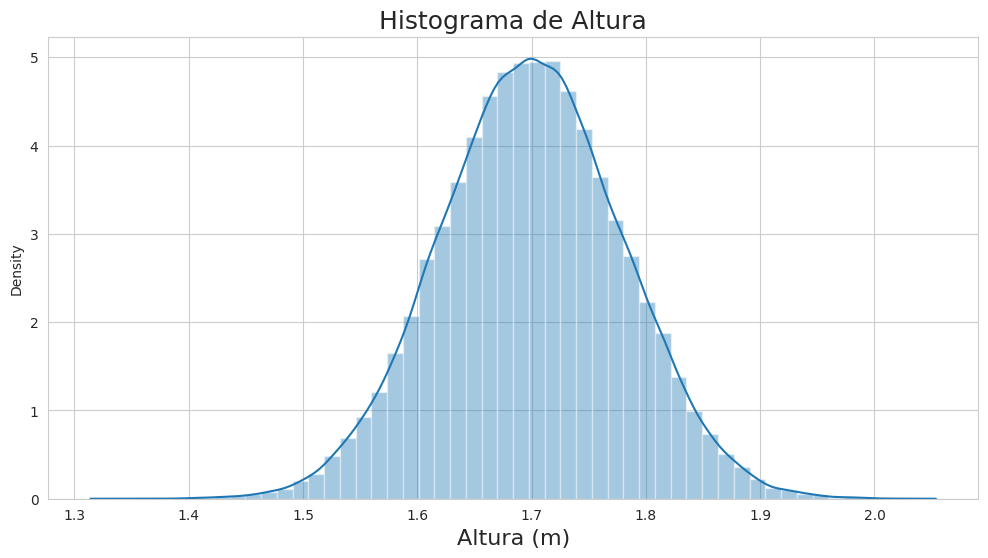

In [490]:
# hacer histograma

ax = sns.distplot(datos.Altura, kde=True)

ax.figure.set_size_inches(12, 6)
ax.set_title('Histograma de Altura', fontsize=18)
ax.set_xlabel('Altura (m)', fontsize=16)
ax

<Axes: title={'center': 'Histograma de Altura'}, xlabel='Altura (m)', ylabel='Count'>

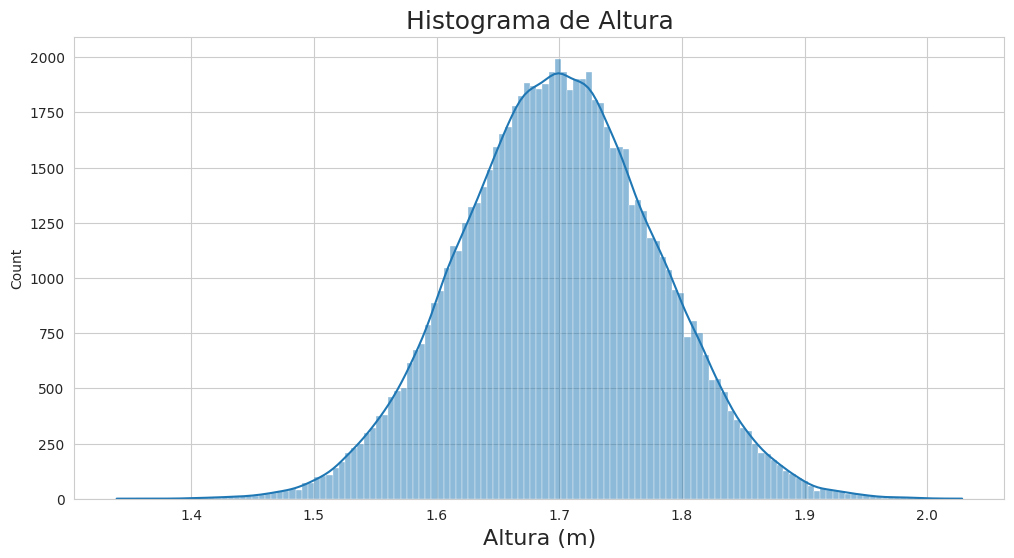

In [491]:
ax = sns.histplot(datos.Altura, kde=True)

# Ajustar tamaño y etiquetas
ax.figure.set_size_inches(12, 6)
ax.set_title('Histograma de Altura', fontsize=18)
ax.set_xlabel('Altura (m)', fontsize=16)

ax

# <font color=#56B4E9>3 MEDIDAS DE TENDENCIA CENTRAL</font>
***

## DataFrame de ejemplo

In [492]:
df = pd.DataFrame(data = {'María': [8, 10, 4, 8, 6, 10, 8],
                          'Pedro': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Pablo': [7.5, 8, 7, 8, 8, 8.5, 7]},
                  index = ['Matemática',
                           'Portugués',
                           'Inglés',
                           'Geografía',
                           'Historia',
                           'Física',
                           'Química'])
df.rename_axis('Asignaturas', axis = 'columns', inplace = True)
df

Asignaturas,María,Pedro,Pablo
Matemática,8,10.0,7.5
Portugués,10,2.0,8.0
Inglés,4,0.5,7.0
Geografía,8,1.0,8.0
Historia,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


## <font color=#56B4E9>3.1 Media aritmética</font>
***

Es representada por $\mu$ cuando se refiere a la población y por $\bar{X}$ cuando se refiere a la muestra

# $$\mu = \frac 1n\sum_{i=1}^{n}X_i$$

donde

$n$ = número de observaciones (registros)

$X_i$ = valor de la i-ésima observación (registro)

In [493]:
# calcular la media de valores

(8 + 10 + 4 + 8 + 6 + 10 + 8) / 7

7.714285714285714

In [494]:
# funcion para la media

df['María'].mean()

np.float64(7.714285714285714)

In [495]:
# media por los sexos de las personas que ingresan

datos.groupby(['Sexo'])['Ingreso'].mean()

,Ingreso
Sexo,
0,2192.441596
1,1566.847393


## <font color=#56B4E9>3.2 Mediana</font>
***

Para obtener la mediana de un conjunto de datos, debemos proceder de la siguiente manera:
1. Ordenar el conjunto de datos;
2. Identificar el número de observaciones (registros) del conjunto de datos ($n$);
3. Identicar el elemento del medio:

> Cuando $n$ sea impar, la posición del elemento del medio se obtendrá de la siguiente manera:


# $$Elemento_{Md} = \frac{n+1}{2}$$

> Cuando $n$ sea par, la posición del elemento mediano se obtendrá de la siguiente manera:


# $$Elemento_{Md} = \frac{n}2$$

4. Obtener la mediana:

> Cuando $n$ sea impar:


# $$Md = X_{Elemento_{Md}}$$

> Cuando $n$ sea par:


# $$Md = \frac{X_{Elemento_{Md}} + X_{Elemento_{Md}+1}}2$$
***

### Ejemplo 1 - n impar

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img002.png' width='40%' style="float:left">

In [496]:
# notas de maria

notas_maria = df['María']
notas_maria

,María
Matemática,8
Portugués,10
Inglés,4
Geografía,8
Historia,6
Física,10
Química,8


In [497]:
# ordenar las notas de maria

notas_maria = df['María']
notas_maria = notas_maria.sort_values()
notas_maria

,María
Inglés,4
Historia,6
Geografía,8
Matemática,8
Química,8
Portugués,10
Física,10


In [498]:
# ver los datos

notas_maria.shape[0]

7

In [499]:
# se pone eun una variable

n = notas_maria.shape[0]

In [500]:
# se toma la columna numerica y el index

notas_maria = notas_maria.reset_index()
notas_maria

,index,María
0,Inglés,4
1,Historia,6
2,Geografía,8
3,Matemática,8
4,Química,8
5,Portugués,10
6,Física,10


In [501]:
# elemento del medio

elemento_md = (n + 1) / 2
elemento_md

4.0

In [502]:
notas_maria.loc[elemento_md - 1]

,3
index,Matemática
María,8


In [503]:
# forma facil de la mediana

notas_maria['María'].median()

8.0

### Ejemplo 2 - n par

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img003.png' width='50%' style="float:left">

In [504]:
# ejemplo con pares

notas_pedro = df['Pedro'].sample(6, random_state= 200 )
notas_pedro

,Pedro
Geografía,1.0
Física,9.5
Química,10.0
Historia,3.0
Matemática,10.0
Portugués,2.0


In [505]:
# odenar
notas_pedro = notas_pedro.sort_values()
notas_pedro

,Pedro
Geografía,1.0
Portugués,2.0
Historia,3.0
Física,9.5
Química,10.0
Matemática,10.0


In [506]:
notas_pedro.shape[0]

6

In [507]:
n = notas_pedro.shape[0]

In [508]:
notas_pedro = notas_pedro.reset_index()
notas_pedro

,index,Pedro
0,Geografía,1.0
1,Portugués,2.0
2,Historia,3.0
3,Física,9.5
4,Química,10.0
5,Matemática,10.0


In [509]:
# mediana debemos volver entero
elemento_md = int(n / 2)
elemento_md

3

In [510]:
(notas_pedro.iloc[elemento_md - 1][1] + notas_pedro.iloc[elemento_md][1]) / 2

/tmp/ipython-input-510-2888943676.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (notas_pedro.iloc[elemento_md - 1][1] + notas_pedro.iloc[elemento_md][1]) / 2


np.float64(6.25)

In [511]:
datos.Ingreso.median()

1200.0

### Obtener la mediana en nuestro conjunto de datos

## <font color=#56B4E9>3.3 Moda</font>
***

La moda se puede definir como el valor más frecuente de un conjunto de datos. La moda es ampliamente utilizada para datos cualitativos.

In [512]:
# ejemplo de moda

df.mode()

Asignaturas,María,Pedro,Pablo
0,8,10.0,8.0


In [513]:
ejemplo = pd.Series([1, 2, 2, 3, 4, 4, 5, 6, 7])
ejemplo

,0
0,1
1,2
2,2
3,3
4,4
5,4
6,5
7,6
8,7


In [514]:
ejemplo.mode()

,0
0,2
1,4


In [515]:
datos.Ingreso.mode()

,Ingreso
0,788


In [516]:
# moda multimodal
datos.Altura.mode()

,Altura
0,1.568128
1,1.671225
2,1.681659
3,1.692977
4,1.708163
5,1.708370
6,1.753842
7,1.779073
8,1.796462


### Obteniendo la moda de nuestro dataset

In [517]:
datos.Ingreso.mode()

,Ingreso
0,788


In [518]:
# moda multimodal
datos.Altura.mode()

,Altura
0,1.568128
1,1.671225
2,1.681659
3,1.692977
4,1.708163
5,1.708370
6,1.753842
7,1.779073
8,1.796462


## <font color=#56B4E9>3.4 Relación entre media, mediana e moda</font>
***

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img004.png' width='80%'>

### Evaluando la variable INGRESO

/tmp/ipython-input-519-2879860289.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(datos.query("Ingreso < 20000").Ingreso)


<Axes: xlabel='Ingreso', ylabel='Density'>

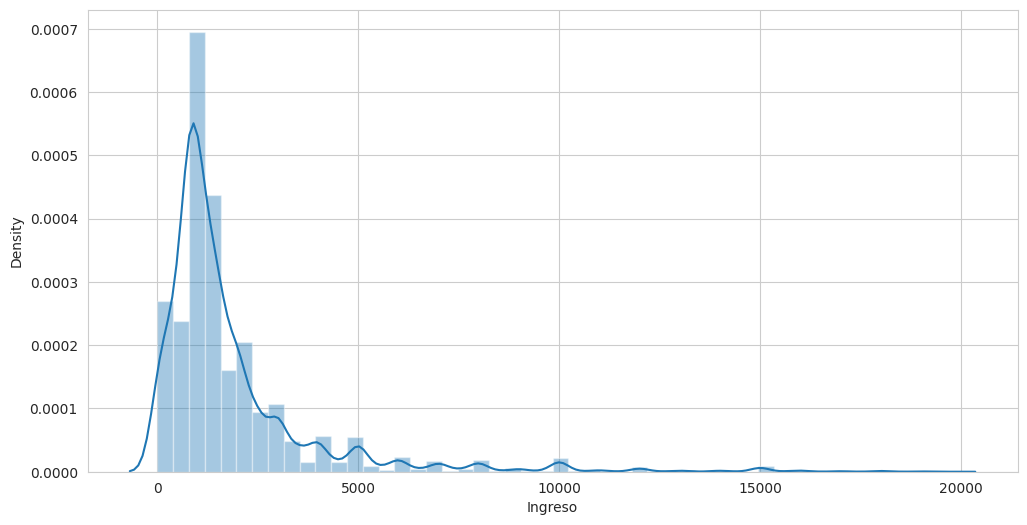

In [519]:
# datos_ingreso

ax = sns.distplot(datos.query("Ingreso < 20000").Ingreso)
ax.figure.set_size_inches(12, 6)
ax

In [520]:
# calcular la moda

moda = datos.Ingreso.mode()[0]
moda

np.int64(788)

In [521]:
# calcular la mediana

mediana = datos.Ingreso.median()
mediana

1200.0

In [522]:
# calcular la media

media = datos.Ingreso.mean()
media

np.float64(2000.3831988547631)

In [523]:
moda < mediana < media

np.True_

***

### Evaluando la variable ALTURA

/tmp/ipython-input-524-190331783.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(datos.Altura)


<Axes: xlabel='Altura', ylabel='Density'>

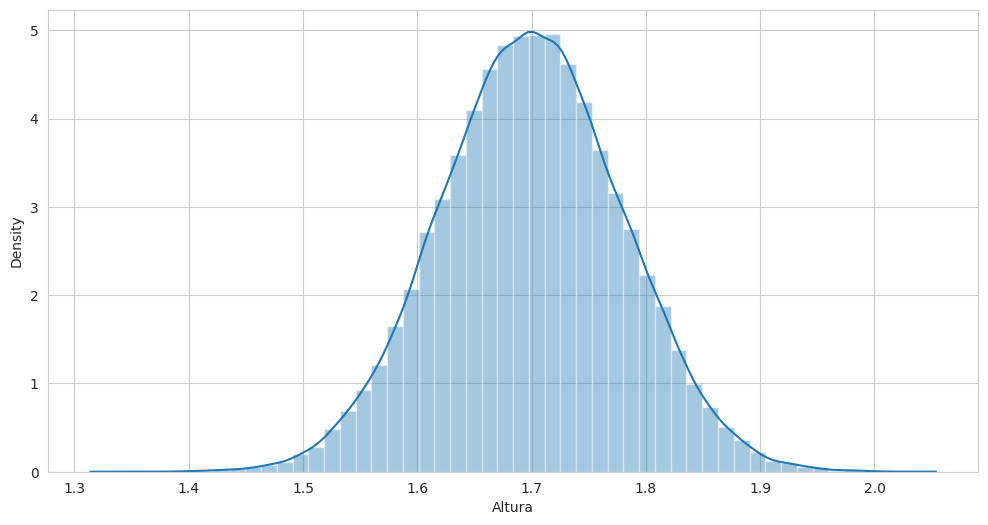

In [524]:
# altura

ax = sns.distplot(datos.Altura)
ax.figure.set_size_inches(12, 6)
ax

In [525]:
# moda

moda = datos.Altura.mode()
moda

,Altura
0,1.568128
1,1.671225
2,1.681659
3,1.692977
4,1.708163
5,1.708370
6,1.753842
7,1.779073
8,1.796462


In [526]:
# Media

media = datos.Altura.mean()
media

np.float64(1.6995124540575741)

In [527]:
# mediana

mediana = datos.Altura.median()
mediana

1.6993247325

***

### Evaluando la variable AÑOS DE ESTUDIO

/tmp/ipython-input-528-896326450.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(datos['Años de Estudio'],bins=17)


<Axes: xlabel='Años de Estudio', ylabel='Density'>

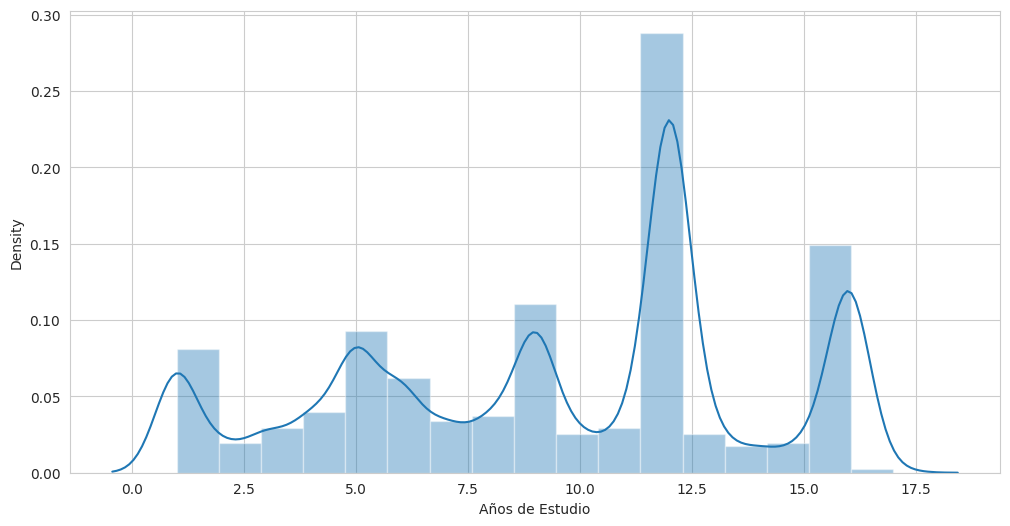

In [528]:
# Años de estudio

ax = sns.distplot(datos['Años de Estudio'],bins=17)
ax.figure.set_size_inches(12, 6)
ax

In [529]:
# moda
moda = datos['Años de Estudio'].mode()[0]
moda

np.int64(12)

In [530]:
# mediana
mediana = datos['Años de Estudio'].median()
mediana

11.0

In [531]:
# media
media = datos['Años de Estudio'].mean()
media

np.float64(9.469664237376367)

In [532]:
moda > mediana > media

np.True_

# <font color=#56B4E9>4 MEDIDAS DE LOCALIZACIÓN</font>
***

## <font color=#56B4E9>4.1 Cuartiles, deciles y percentiles</font>
***

Hay una serie de medidas de posición similares en su diseño a la mediana, aunque no son medidas de tendencia central. Como se sabe, la mediana divide la distribución en dos partes iguales en términos del número de elementos en cada parte. Los cuartiles, por otro lado, permiten que la distribución se divida en cuatro partes iguales en términos del número de elementos en cada uno; deciles en diez partes y centiles en cien partes iguales.

In [533]:
# cuartiles

datos.Ingreso.quantile([0.25, 0.5, 0.75])

,Ingreso
0.25,788.0
0.50,1200.0
0.75,2000.0


In [534]:
# deciles

[i/10 for i in range(1, 10)]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [535]:
# deciles segunda parte

datos.Ingreso.quantile([i/10 for i in range(1, 10)])

,Ingreso
0.1,350.0
0.2,788.0
0.3,800.0
0.4,1000.0
0.5,1200.0
0.6,1500.0
0.7,1900.0
0.8,2500.0
0.9,4000.0


In [536]:
# perceltiles

datos.Ingreso.quantile([i/100 for i in range(1, 100)])

,Ingreso
0.01,0.0
0.02,0.0
0.03,0.0
0.04,50.0
0.05,100.0
...,...
0.95,6000.0
0.96,7000.0
0.97,8000.0
0.98,10000.0


/tmp/ipython-input-537-1027295005.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(datos.Edad,


<Axes: title={'center': 'Distribucion de la Frecuencia Acumulada'}, xlabel='Años', ylabel='Acumulado'>

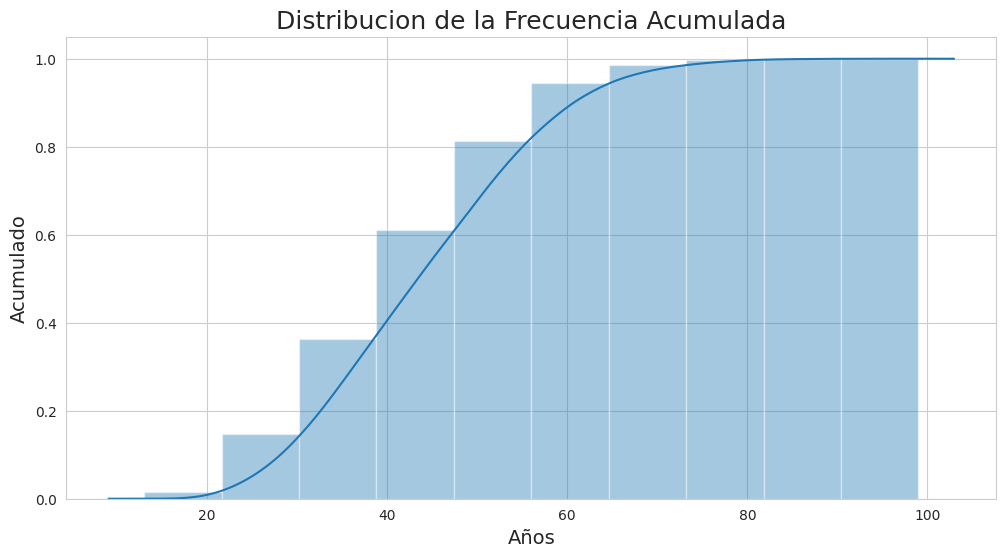

In [537]:
# grafico

ax = sns.distplot(datos.Edad,
                  hist_kws={'cumulative': True},
                  kde_kws={'cumulative': True},
                  bins= 10)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribucion de la Frecuencia Acumulada', fontsize=18)
ax.set_ylabel('Acumulado', fontsize=14)
ax.set_xlabel('Años', fontsize=14)
ax

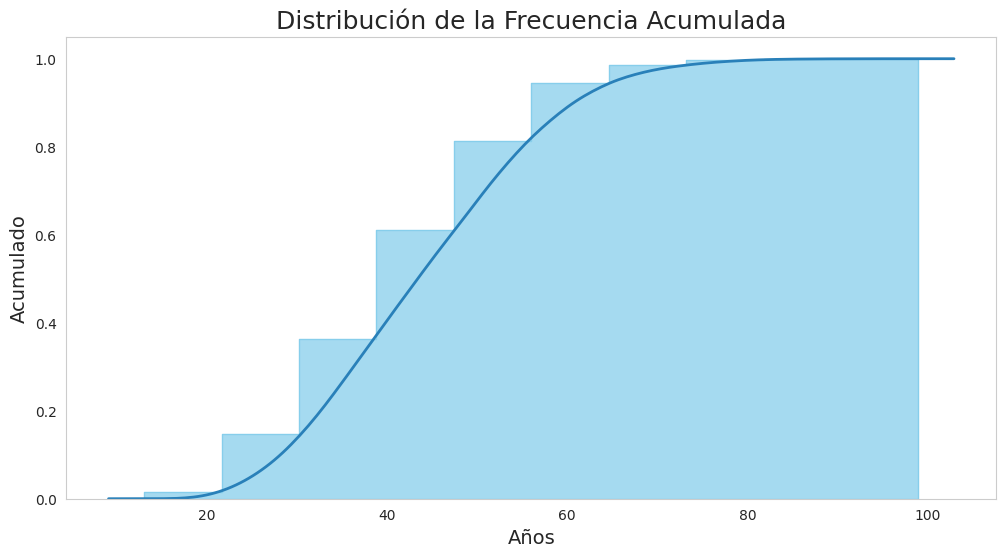

In [538]:
# Estilo claro
sns.set_style("whitegrid")

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(12, 6))
fig.set_facecolor('white')  # Fondo blanco o #f5f5f5 si quieres un tono más suave

# Histograma acumulado con relleno azul claro
sns.histplot(data=datos,
             x="Edad",
             bins=10,
             stat="density",
             cumulative=True,
             fill=True,
             element="step",
             color='skyblue',
             ax=ax)

# Línea KDE acumulada en azul medio (como la de la imagen)
sns.kdeplot(data=datos,
            x="Edad",
            cumulative=True,
            color='#2980b9',
            linewidth=2,
            ax=ax)

# Títulos y etiquetas
ax.set_title('Distribución de la Frecuencia Acumulada', fontsize=18)
ax.set_ylabel('Acumulado', fontsize=14)
ax.set_xlabel('Años', fontsize=14)

# Opcional: quitar la cuadrícula si prefieres más limpio
ax.grid(False)

# Fondo del gráfico
ax.set_facecolor('white')  # fondo del área de datos

In [539]:
datos.Edad.quantile([i/10 for i in range(1,10)])

,Edad
0.1,28.0
0.2,33.0
0.3,36.0
0.4,40.0
0.5,43.0
0.6,47.0
0.7,51.0
0.8,55.0
0.9,61.0


## <font color=#56B4E9>4.2 Box-plot</font>
***

El *box plot* da una idea de la posición, dispersión, asimetría, colas y valores extremos. La posición central está dada por la mediana y la dispersión por $IIQ$ (distancia inter cuartil). Las posiciones relativas de $Q1$, $Mediana$ y $Q3$ dan una idea de la simetría de la distribución. Las longitudes de las colas están dadas por las líneas que van desde el rectángulo a los valores remotos y por los valores extremos.

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img005.png' width='65%'>

<Axes: title={'center': 'Altura'}, xlabel='Metros'>

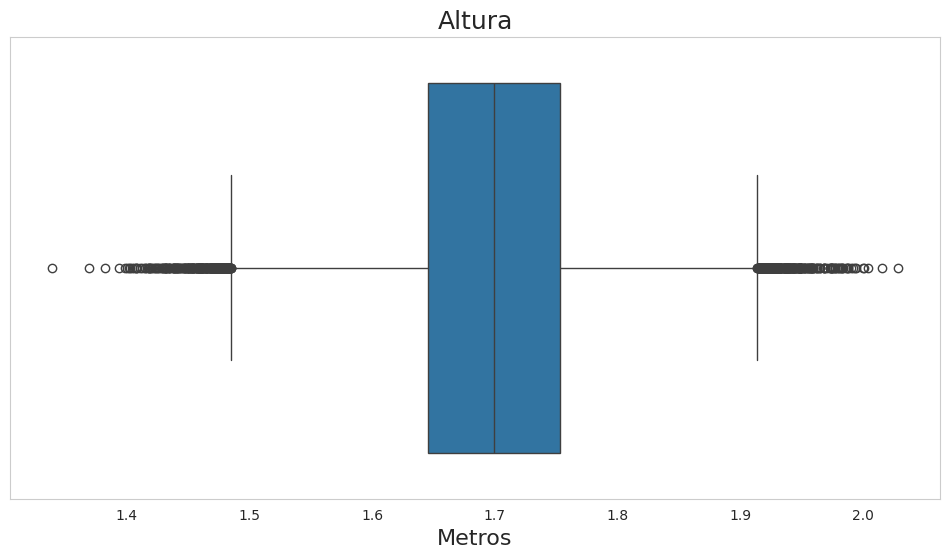

In [540]:
# graficar

ax = sns.boxplot(x='Altura', data=datos, orient= 'h')
ax.figure.set_size_inches(12, 6)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=16)
ax.grid(False)
ax

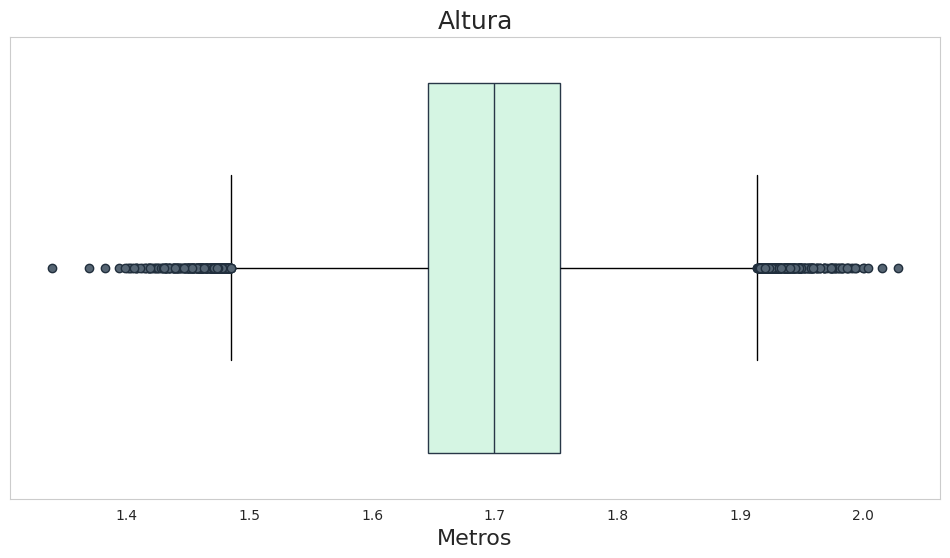

In [541]:
# Crear gráfico básico
ax = sns.boxplot(x='Altura', data=datos, orient='h',
                 boxprops=dict(facecolor='#d5f5e3', edgecolor='#283747'),
                 medianprops=dict(color='#283747'),
                 whiskerprops=dict(color='black'),
                 capprops=dict(color='black'),
                 flierprops=dict(marker='o', markerfacecolor='#566573', markeredgecolor='#212f3d'))

ax.figure.set_size_inches(12, 6)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=16)
ax.set_facecolor('white')
ax.figure.set_facecolor('white')
ax.grid(False)

<Axes: title={'center': 'Altura'}, xlabel='Metros', ylabel='Sexo'>

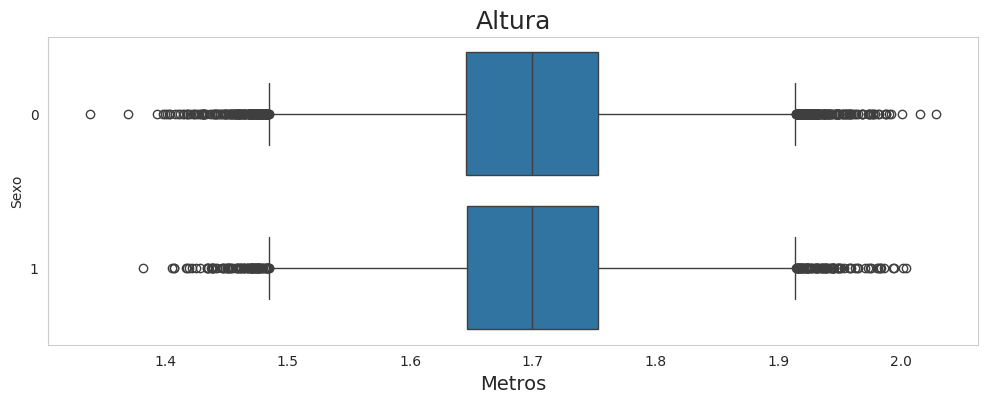

In [542]:
# dos variables

ax = sns.boxplot(x='Altura', y='Sexo', data= datos, orient= 'h' )
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax.grid(False)
ax

/tmp/ipython-input-543-3211398960.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


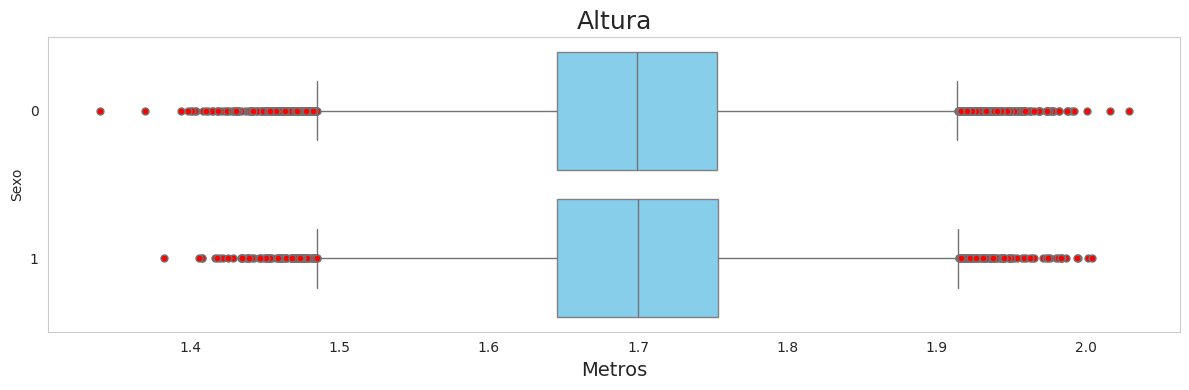

In [543]:
# Gráfico boxplot mejorado
ax = sns.boxplot(
    x='Altura',
    y='Sexo',
    data=datos,
    orient='h',
    palette='pastel',  # colores suaves
    boxprops=dict(facecolor='skyblue', edgecolor='gray'),  # caja personalizada
    flierprops=dict(marker='o', markerfacecolor='red', markersize=5)  # outliers en rojo
)

ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax.grid(False)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Ingreso'}, xlabel='Miles de pesos'>

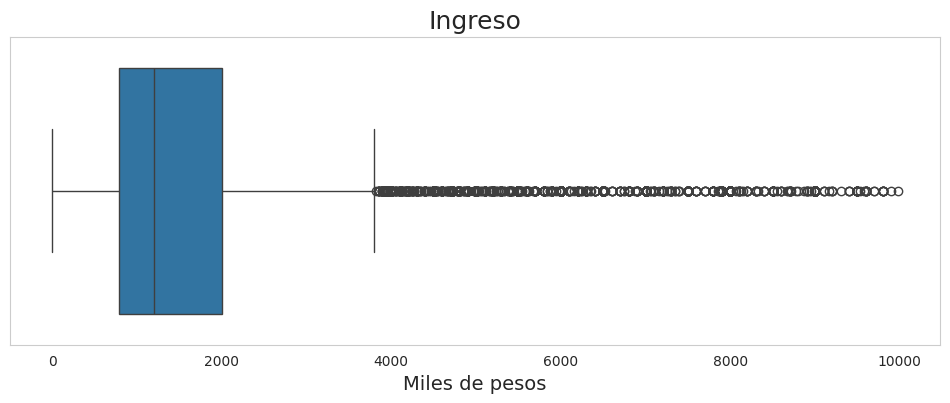

In [544]:
# Ingreso ejemplo aprender

ax = sns.boxplot(x='Ingreso', data= datos.query("Ingreso < 10000"), orient= 'h' )
ax.figure.set_size_inches(12, 4)
ax.set_title('Ingreso', fontsize=18)
ax.set_xlabel('Miles de pesos', fontsize=14)
ax.grid(False)
ax

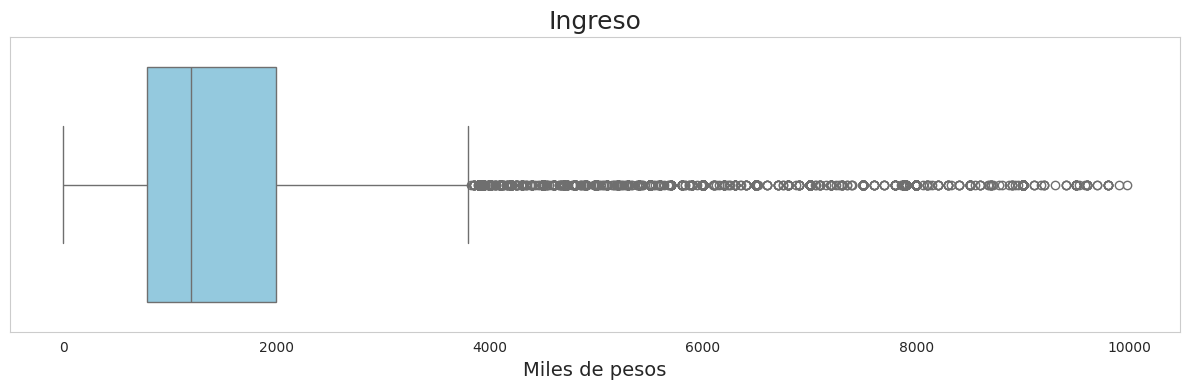

In [545]:
# Filtrar los datos
filtro = datos.query("Ingreso < 10000")
ingresos = filtro['Ingreso']

# Calcular cuartiles
q1 = np.percentile(ingresos, 25)
q2 = np.median(ingresos)
q3 = np.percentile(ingresos, 75)

# Graficar boxplot
ax = sns.boxplot(x='Ingreso', data=filtro, orient='h', color='skyblue')
ax.figure.set_size_inches(12, 4)
ax.set_title('Ingreso', fontsize=18)
ax.set_xlabel('Miles de pesos', fontsize=14)
ax.grid(False)

plt.tight_layout()
plt.show()

<Axes: title={'center': 'Ingreso'}, xlabel='Miles de pesos', ylabel='Sexo'>

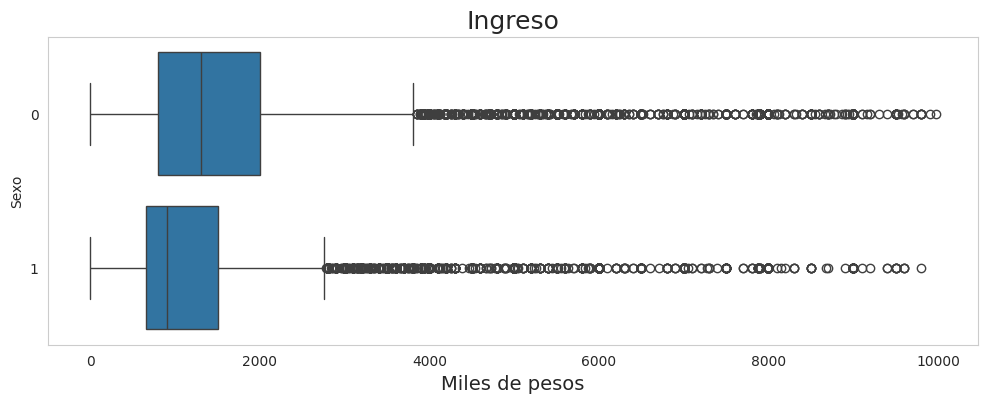

In [546]:
# Ingreso ejemplo aprender

ax = sns.boxplot(x='Ingreso', y='Sexo',data= datos.query("Ingreso < 10000"), orient= 'h' )
ax.figure.set_size_inches(12, 4)
ax.set_title('Ingreso', fontsize=18)
ax.set_xlabel('Miles de pesos', fontsize=14)
ax.grid(False)
ax

<Axes: title={'center': 'Ingreso'}, xlabel='Miles de pesos'>

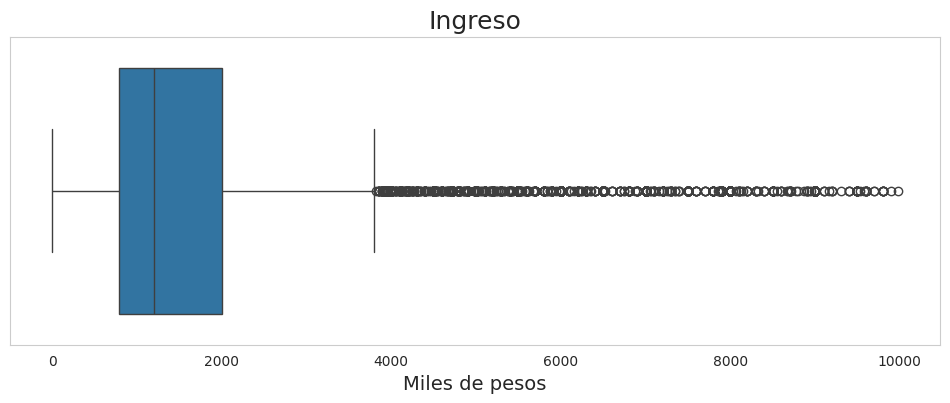

In [547]:
# A ejemplo aprender

ax = sns.boxplot(x='Ingreso', data= datos.query("Ingreso < 10000"), orient= 'h' )
ax.figure.set_size_inches(12, 4)
ax.set_title('Ingreso', fontsize=18)
ax.set_xlabel('Miles de pesos', fontsize=14)
ax.grid(False)
ax

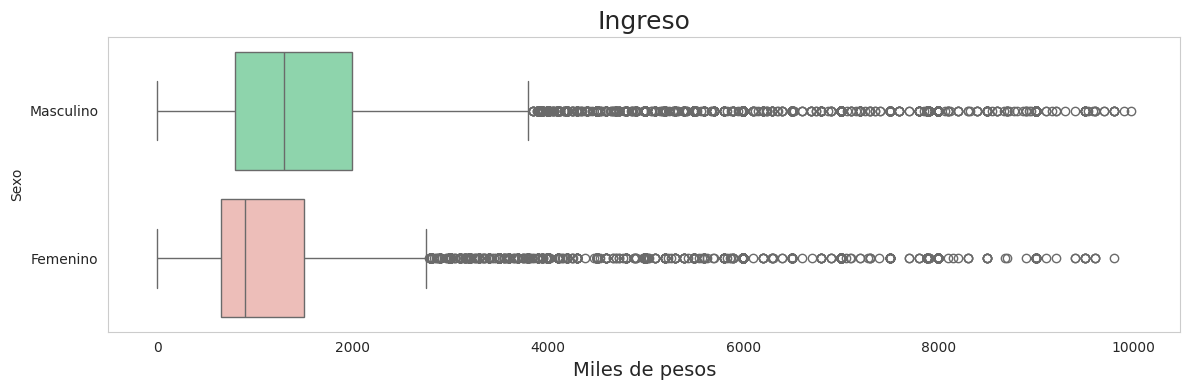

In [548]:
# Preparar los datos
filtro = datos.query("Ingreso < 10000").copy()
filtro['Sexo'] = filtro['Sexo'].map({0: 'Masculino', 1: 'Femenino'})

# Gráfico con hue y legend=False
ax = sns.boxplot(
    x='Ingreso',
    y='Sexo',
    hue='Sexo',  # ahora se usa hue para los colores
    data=filtro,
    orient='h',
    palette={'Masculino': '#82e0aa', 'Femenino': '#f5b7b1'},
    legend=False  # oculta la leyenda automática
)

# Personalización
ax.figure.set_size_inches(12, 4)
ax.set_title('Ingreso', fontsize=18)
ax.set_xlabel('Miles de pesos', fontsize=14)
ax.grid(False)

plt.tight_layout()
plt.show()

<Axes: title={'center': 'Años de estudio'}, xlabel='Años'>

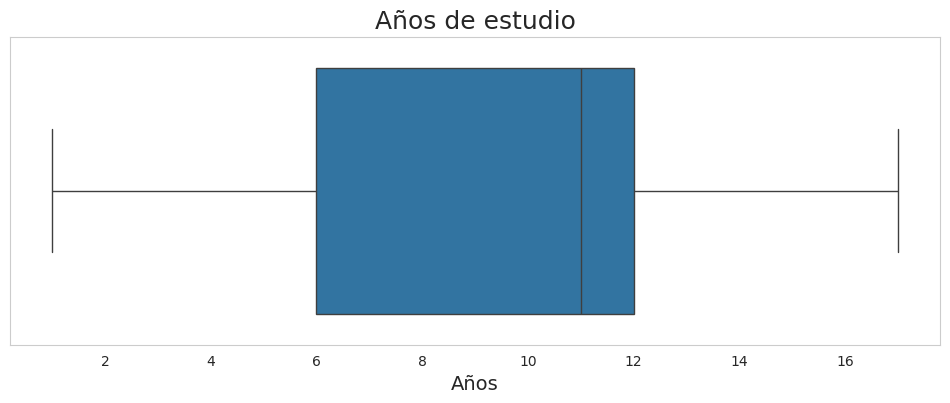

In [549]:
# Años de estudio

ax = sns.boxplot(x='Años de Estudio', data=datos, orient= 'h' )
ax.figure.set_size_inches(12, 4)
ax.set_title('Años de estudio', fontsize=18)
ax.set_xlabel('Años', fontsize=14)
ax.grid(False)
ax

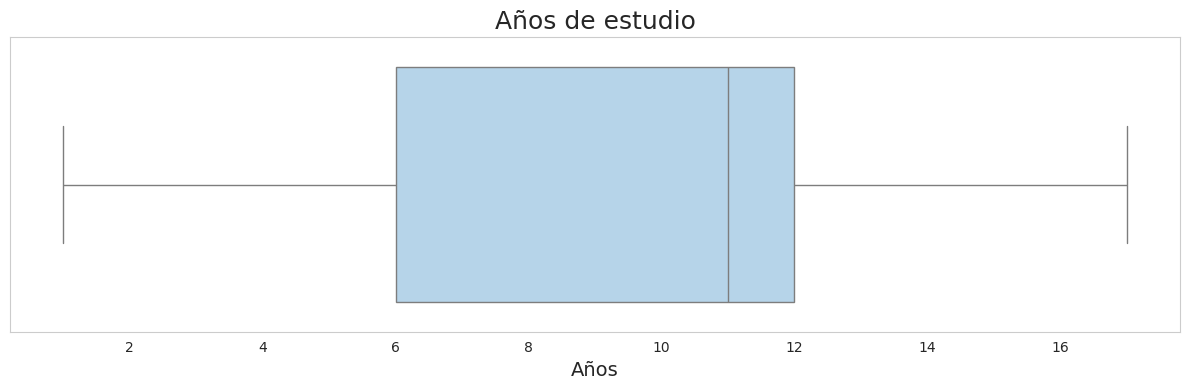

In [550]:
# Calcular cuartiles
q1 = np.percentile(datos['Años de Estudio'], 25)
q2 = np.median(datos['Años de Estudio'])
q3 = np.percentile(datos['Años de Estudio'], 75)

# Gráfico
ax = sns.boxplot(x='Años de Estudio', data=datos, orient='h', color='#aed6f1')
ax.figure.set_size_inches(12, 4)
ax.set_title('Años de estudio', fontsize=18)
ax.set_xlabel('Años', fontsize=14)
ax.grid(False)

plt.tight_layout()
plt.show()


<Axes: title={'center': 'Años de estudio'}, xlabel='Años', ylabel='Sexo'>

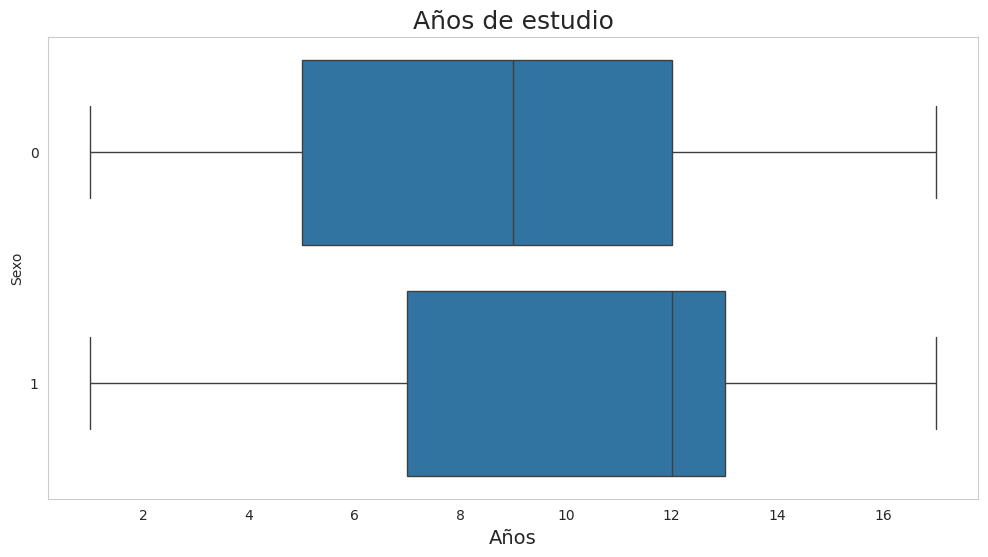

In [551]:
# Años de estudio

ax = sns.boxplot(x='Años de Estudio', y='Sexo',data=datos, orient= 'h' )
ax.figure.set_size_inches(12, 6)
ax.set_title('Años de estudio', fontsize=18)
ax.set_xlabel('Años', fontsize=14)
ax.grid(False)
ax

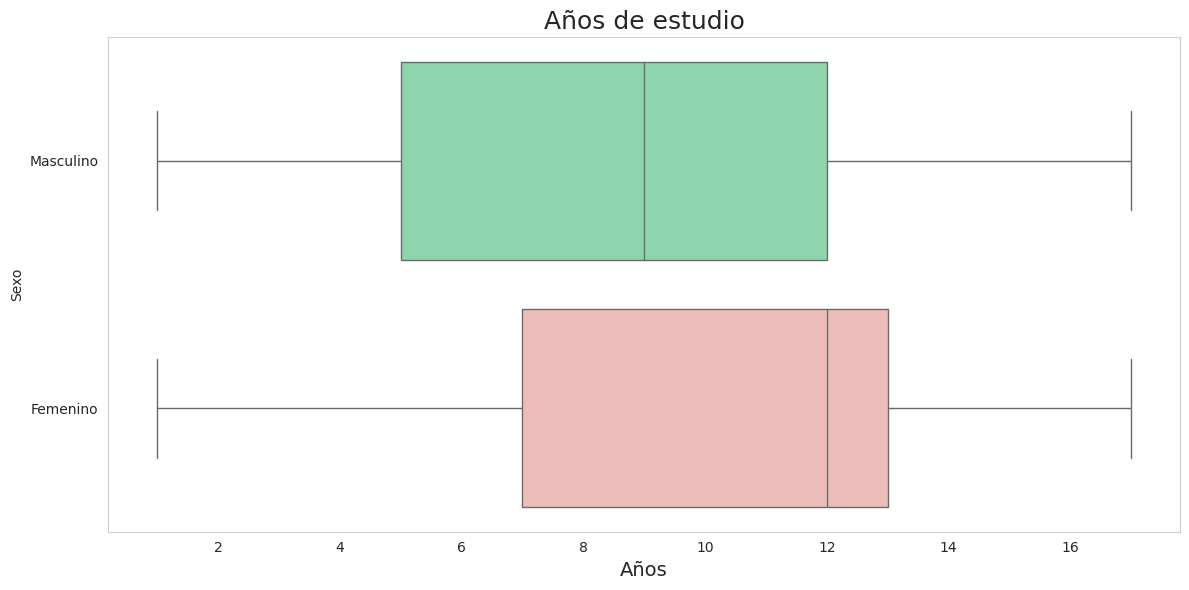

In [552]:
# Preparar los datos (sin filtro esta vez)
filtro = datos.copy()
filtro['Sexo'] = filtro['Sexo'].map({0: 'Masculino', 1: 'Femenino'})

# Gráfico con hue (y sin leyenda)
ax = sns.boxplot(
    x='Años de Estudio',
    y='Sexo',
    hue='Sexo',
    data=filtro,
    orient='h',
    palette={'Masculino': '#82e0aa', 'Femenino': '#f5b7b1'},
    legend=False
)

# Personalización
ax.figure.set_size_inches(12, 6)
ax.set_title('Años de estudio', fontsize=18)
ax.set_xlabel('Años', fontsize=14)
ax.grid(False)

plt.tight_layout()
plt.show()

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img006.png' width='80%'>

# <font color=#56B4E9>5 MEDIDAS DE DISPERSIÓN</font>
***

Aunque las medidas de tendencia central y de localización proporcionan un resumen muy importante de los datos, pueden no ser suficientes para caracterizar diferentes conjuntos, especialmente cuando las observaciones de una distribución dada presentan datos muy dispersos.

## <font color=#56B4E9>5.1 Desviación media absoluta</font>
***


# $$DM = \frac 1n\sum_{i=1}^{n}|X_i-\bar{X}|$$


In [553]:
# traemos en dataframe

df


Asignaturas,María,Pedro,Pablo
Matemática,8,10.0,7.5
Portugués,10,2.0,8.0
Inglés,4,0.5,7.0
Geografía,8,1.0,8.0
Historia,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [554]:
# df Maria

notas_maria_dispersion = df[['María']]
notas_maria_dispersion

Asignaturas,María
Matemática,8
Portugués,10
Inglés,4
Geografía,8
Historia,6
Física,10
Química,8


In [555]:
# desviacion media absoluta

notas_media_maria = notas_maria_dispersion.mean().iloc[0]
notas_media_maria

np.float64(7.714285714285714)

In [556]:
# crear nueva columna
# aqui hay valores negativos

notas_maria_dispersion.loc[:,'Desviacion'] = notas_maria_dispersion['María'] - notas_media_maria
notas_maria_dispersion

/tmp/ipython-input-556-347671071.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notas_maria_dispersion.loc[:,'Desviacion'] = notas_maria_dispersion['María'] - notas_media_maria


Asignaturas,María,Desviacion
Matemática,8,0.285714
Portugués,10,2.285714
Inglés,4,-3.714286
Geografía,8,0.285714
Historia,6,-1.714286
Física,10,2.285714
Química,8,0.285714


In [557]:
# desviacion absoluta

notas_maria_dispersion.loc[:,'|Desviacion|'] = notas_maria_dispersion['Desviacion'].abs()
notas_maria_dispersion

Asignaturas,María,Desviacion,|Desviacion|
Matemática,8,0.285714,0.285714
Portugués,10,2.285714,2.285714
Inglés,4,-3.714286,3.714286
Geografía,8,0.285714,0.285714
Historia,6,-1.714286,1.714286
Física,10,2.285714,2.285714
Química,8,0.285714,0.285714


In [559]:
# biblioteca para estadistica

!pip install scipy

In [560]:
import scipy.stats as stats

In [561]:
# calculo

mad_notas_maria = stats.median_abs_deviation(notas_maria_dispersion['María'])
mad_notas_maria

np.float64(2.0)

## <font color=#56B4E9>5.2 Varianza</font>
***

### Varianza

La varianza se construye a partir de las diferencias entre cada observación y la media de los datos, es decir, la desviación alrededor de la media. Al calcular la varianza, las desviaciones alrededor de la media son elevadas al cuadrado.

### Varianza de la población

# $$\sigma^2 = \frac 1n\sum_{i=1}^{n}(X_i-\mu)^2$$

### Varianza de la muestra

# $$S^2 = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2$$

In [562]:
# deviacion alrededor de la media

notas_maria_dispersion.loc[:,'Desviacion'] = notas_maria_dispersion['María'] - notas_media_maria
notas_maria_dispersion

Asignaturas,María,Desviacion,|Desviacion|
Matemática,8,0.285714,0.285714
Portugués,10,2.285714,2.285714
Inglés,4,-3.714286,3.714286
Geografía,8,0.285714,0.285714
Historia,6,-1.714286,1.714286
Física,10,2.285714,2.285714
Química,8,0.285714,0.285714


In [564]:
# crear nueva columna
notas_maria_dispersion.loc[:,'Desviacion^2'] = notas_maria_dispersion['Desviacion'].pow(2)
notas_maria_dispersion


Asignaturas,María,Desviacion,|Desviacion|,Desviacion^2
Matemática,8,0.285714,0.285714,0.081633
Portugués,10,2.285714,2.285714,5.224490
Inglés,4,-3.714286,3.714286,13.795918
Geografía,8,0.285714,0.285714,0.081633
Historia,6,-1.714286,1.714286,2.938776
Física,10,2.285714,2.285714,5.224490
Química,8,0.285714,0.285714,0.081633


In [568]:
# desviacion

notas_maria_dispersion['Desviacion^2'].sum() / (len(notas_maria_dispersion) - 1)

np.float64(4.57142857142857)

In [569]:
# forma facil

notas_maria_dispersion['María'].var()

4.57142857142857

## <font color=#56B4E9>5.3 Desviación estándar</font>
***

Una de las restricciones de la varianza es el hecho de que proporciona medidas cuadráticas de las unidades originales; la varianza de las medidas de longitud, por ejemplo, está en unidades de área. Por lo tanto, el hecho de que las unidades sean diferentes dificulta la comparación de la dispersión con las variables que la definen. Una forma de eliminar esta dificultad es considerar su raíz cuadrada.

### Desviación estándar de la población

# $$\sigma = \sqrt{\frac 1n\sum_{i=1}^{n}(X_i-\mu)^2} \Longrightarrow \sigma = \sqrt{\sigma^2}$$


### Desviación estándar de la muestra

# $$S = \sqrt{\frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2} \Longrightarrow S = \sqrt{S^2}$$

In [572]:
# desviacion

varianza = notas_maria_dispersion['María'].var()
varianza

4.57142857142857

In [573]:
np.sqrt(varianza)

np.float64(2.1380899352993947)

In [575]:
# desviacion estandar

desviacion_estandar = notas_maria_dispersion['María'].std()
desviacion_estandar

2.1380899352993947

In [576]:
# calcular notas

df.mean()

,0
Asignaturas,
María,7.714286
Pedro,5.142857
Pablo,7.714286


In [577]:
df.median()

,0
Asignaturas,
María,8.0
Pedro,3.0
Pablo,8.0


In [578]:
df.mode()

Asignaturas,María,Pedro,Pablo
0,8,10.0,8.0


In [579]:
df.std()

,0
Asignaturas,
María,2.138090
Pedro,4.460141
Pablo,0.566947


In [583]:
# desviacion estandar ejercicio

horas = [7, 6, 8, 7.5, 6.5, 8.5]
desviacion = np.std(horas, ddof=1)  # ddof=1 → muestra
print(f"Desviación estándar: {desviacion:.2f}")

Desviación estándar: 0.94
